<h1 style="font-size:50px"><center>Exploratory Data Analysis of Formula 1 Data</center></h1

The following Notebook will be looking at Formula 1 Dataset that looks at variety of data from Drivers, circuits to Pitstops, the data ranges from 1950 to the 2022. The notebook will look at performing an exploratory analysis on the Formula 1 data by using libraries such as Pandas, numpy, matplotlib and seaborn. The data was sourced from Kaggle, which is a Data Science platfrom: <a>https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020</a>

In [2]:
#Import Packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h2>Load in Data</h2>

In [46]:
results = pd.read_csv('F1/results.csv')
races = pd.read_csv('F1/races.csv')
drivers = pd.read_csv('F1/drivers.csv')
constructors = pd.read_csv('F1/constructors.csv')

In [47]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [41]:
races.head()

,year,round,circuitId,name,date,time,url
raceId,,,,,,,
1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [53]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [52]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


<h2>Data Cleaning</h2>

In [55]:
#Merge Datasets into one dataframe

df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on='driverId', how='left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')

In [56]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [57]:
#Display columns
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name_x', 'round', 'driverRef',
       'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [58]:
#Drop unnecessary columns 
df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId',
         'resultId', 'raceId', 'driverId', 'constructorId'], axis=1, inplace=True)

In [59]:
df.columns

Index(['grid', 'positionOrder', 'points', 'time', 'milliseconds', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'year', 'name_x', 'round',
       'driverRef', 'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [62]:
#Rename Columns

df.rename(columns={'rank':'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality',
                  'name_y': 'constructor_name', 'nationality_y':'constructor_nationality', 'driverRef':'driver',
                  'fastestLapTime':'fastest_lap_time', 'fastestLapSpeed':'fastest_lap_speed', 
                   'positionOrder':'position_order'}, inplace=True)

In [63]:
#Rearrange Columns

df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name', 'grid', 'position_order', 'points', 'time', 
        'milliseconds', 'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'driver_nationality',
        'constructor_nationality']]

In [71]:
#Dropping the 2022 season as it is still incomplete

df = df[df['year']!=2022]

In [72]:
#Sorting the values by year, round and postiton_order

df = df.sort_values(by=['year', 'round', 'position_order'], ascending=[False, True, True])

In [73]:
#Replace \N values into NAN in time columns

df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace=True)
df.fastest_lap_time.replace('\\N', np.nan, inplace=True)
df.fastest_lap_speed.replace('\\N', np.nan, inplace=True)

In [74]:
#Change datatypes
df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [75]:
#reset index
df.reset_index(drop=True, inplace=True)

In [79]:
#Show Dataframe so far
df.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
5,2021,Bahrain Grand Prix,1,leclerc,Ferrari,4,6,8.0,+59.090,5582987.0,11.0,1:34.988,205.112,Monegasque,Italian
6,2021,Bahrain Grand Prix,1,ricciardo,McLaren,6,7,6.0,+66.004,5589901.0,10.0,1:34.932,205.233,Australian,British
7,2021,Bahrain Grand Prix,1,sainz,Ferrari,8,8,4.0,+67.100,5590997.0,7.0,1:34.509,206.151,Spanish,Italian
8,2021,Bahrain Grand Prix,1,tsunoda,AlphaTauri,13,9,2.0,+85.692,5609589.0,8.0,1:34.761,205.603,Japanese,Italian
9,2021,Bahrain Grand Prix,1,stroll,Aston Martin,10,10,1.0,+86.713,5610610.0,9.0,1:34.865,205.378,Canadian,British


In [77]:
#Check the Shape
df.shape

(25400, 15)

In [78]:
#Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  int64  
 1   gp_name                  25400 non-null  object 
 2   round                    25400 non-null  int64  
 3   driver                   25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int64  
 6   position_order           25400 non-null  int64  
 7   points                   25400 non-null  float64
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   float64
 10  fastest_lap_rank         7151 non-null   float64
 11  fastest_lap_time         6953 non-null   object 
 12  fastest_lap_speed        6953 non-null   float64
 13  driver_nationality       25400 non-null  object 
 14  constructor_nationalit

In [80]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

<h2>Data Aggregations (GroupBy)</h2>

In [93]:
#Grand Prix (GP) Winners
driver_winner = df.loc[df['position_order']==1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

In [134]:
driver_winner.head()

,driver,position_order
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41


In [122]:
constructor_winner = df.loc[df['position_order']==1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

In [133]:
constructor_winner.head()

,constructor_name,position_order
0,Ferrari,239
1,McLaren,179
2,Mercedes,124
3,Williams,114
4,Red Bull,75


In [131]:
#Which Nationality has one the most Grand Prix
nation_winner = df.loc[df['position_order']==1].groupby('driver_nationality')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

In [132]:
nation_winner.head()

,driver_nationality,position_order
0,British,308
1,German,179
2,Brazilian,101
3,French,81
4,Finnish,57


<h2>Data Visualization</h2>

([], [])

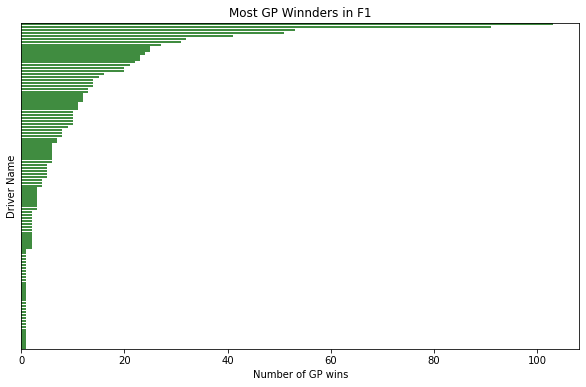

In [100]:
#Bar Plot of the Drivers that have won the most Grand Prix races
sns.barplot(data=driver_winner, y='driver', x='position_order', color='green', alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [136]:
#Find the top 10 drivers who win
top10Drivers = driver_winner.head(10)
print(top10Drivers)

               driver  position_order
0            hamilton             103
1  michael_schumacher              91
2              vettel              53
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


Text(0.5, 0, 'Number of GP wins')

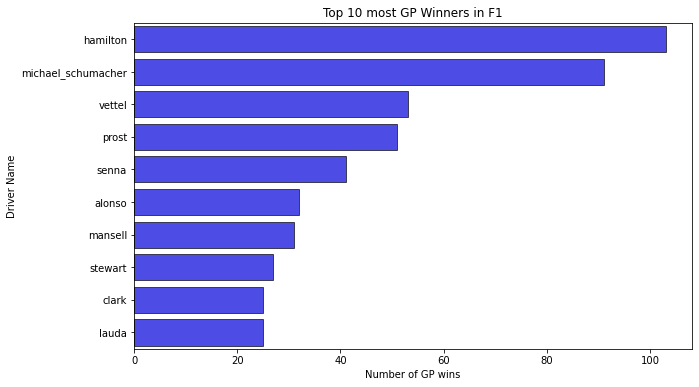

In [140]:
#Bar plot of the 10 drivers in terms of Grand Prix wins
sns.barplot(data=top10Drivers, y='driver', x='position_order', color='blue', alpha=0.8, 
            linewidth=.8, edgecolor='black')
plt.title('Top 10 most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')


([], [])

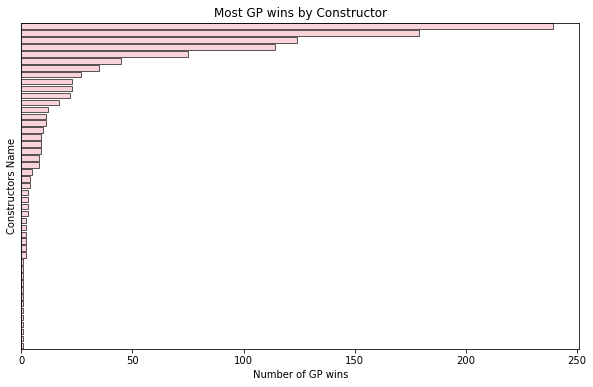

In [143]:
#Bar Plot of the top constructors in terms of Grand Prix wins
sns.barplot(data=constructor_winner, y='constructor_name', x='position_order',
           color='pink', alpha=0.8, linewidth=.8, edgecolor='black')

plt.title('Most GP wins by Constructor')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [144]:
top10constructors = constructor_winner.head(10)

print(top10constructors)

  constructor_name  position_order
0          Ferrari             239
1          McLaren             179
2         Mercedes             124
3         Williams             114
4         Red Bull              75
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP wins')

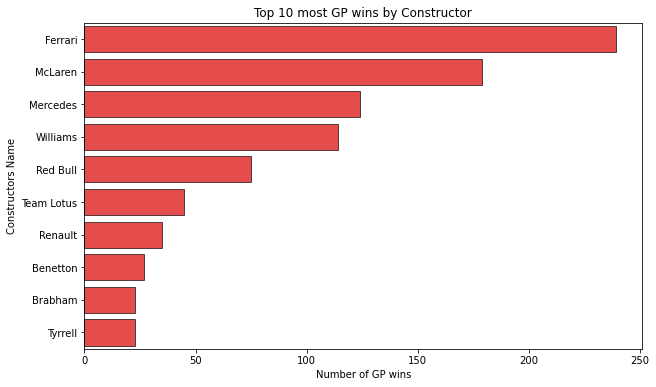

In [146]:
sns.barplot(data=top10constructors, y='constructor_name', x='position_order',
           color='red', alpha=0.8, linewidth=.8, edgecolor='black')

plt.title('Top 10 most GP wins by Constructor')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP wins')


Text(0.5, 0, 'Starting Position')

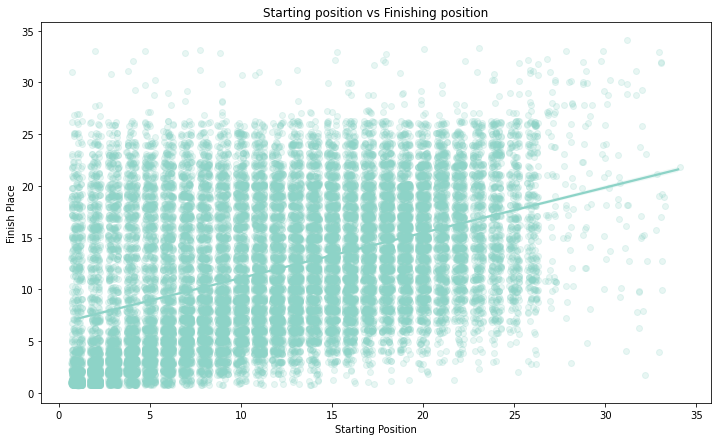

In [150]:
df_no_zero = df[df['grid'] != 0]

#Regression plot for starting vs finishing position
plt.figure(figsize=[12, 7])
sns.regplot(data=df_no_zero, x='grid', y='position_order', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/5})
plt.title('Starting position vs Finishing position')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')

In [156]:
#Creating a new dataframe to look at speed however data is only 
#present from 2004 onawrds
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

In [157]:
df_group_speed.head()

,gp_name,year,fastest_lap_speed
0,70th Anniversary Grand Prix,2020,234.248250
1,Abu Dhabi Grand Prix,2009,198.041100
2,Abu Dhabi Grand Prix,2010,193.559045
3,Abu Dhabi Grand Prix,2011,189.779522
4,Abu Dhabi Grand Prix,2012,187.682739


Text(0.5, 0.98, 'Average speed amongst all teams during the fastest lap at individual GPs')

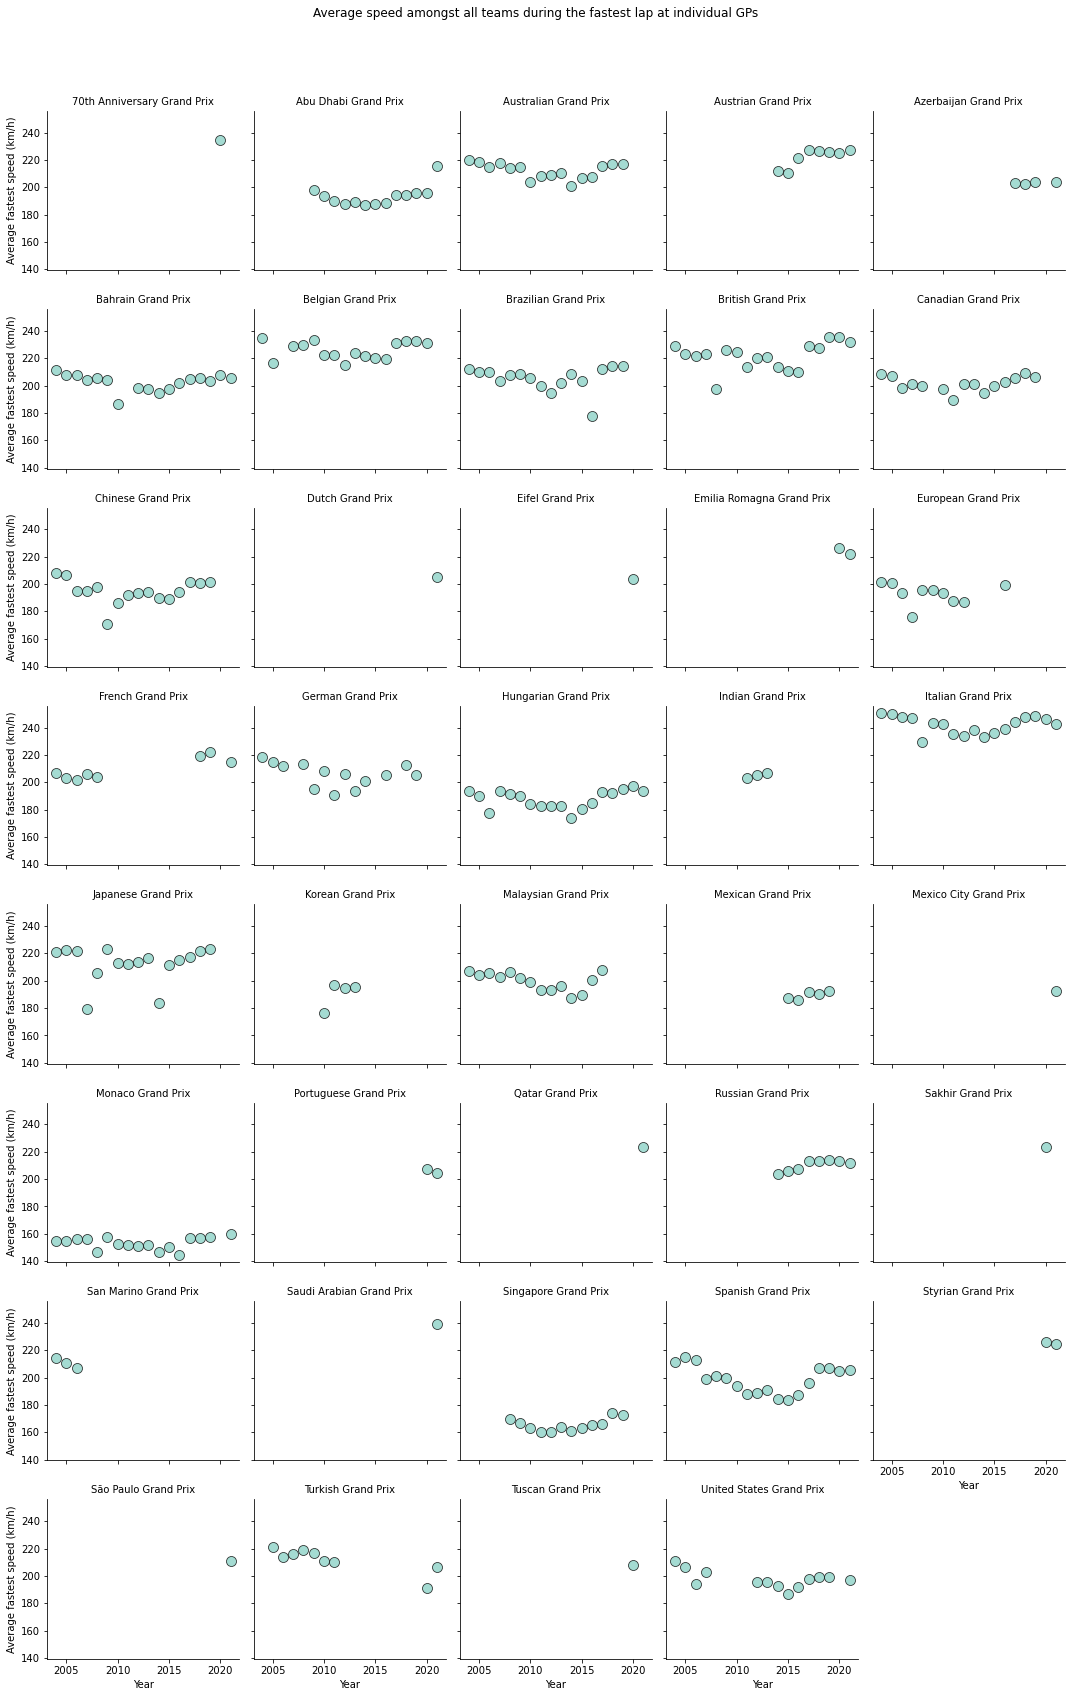

In [164]:
#Create a Facetgrid which is used to show multiple graphs
g = sns.FacetGrid(data=df_group_speed, col='gp_name', 
                 col_wrap=5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha=0.8, linewidth=.8, edgecolor='black', s=100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs')